# In a separate tab, Download the Kaggle API Token file from kaggle.com

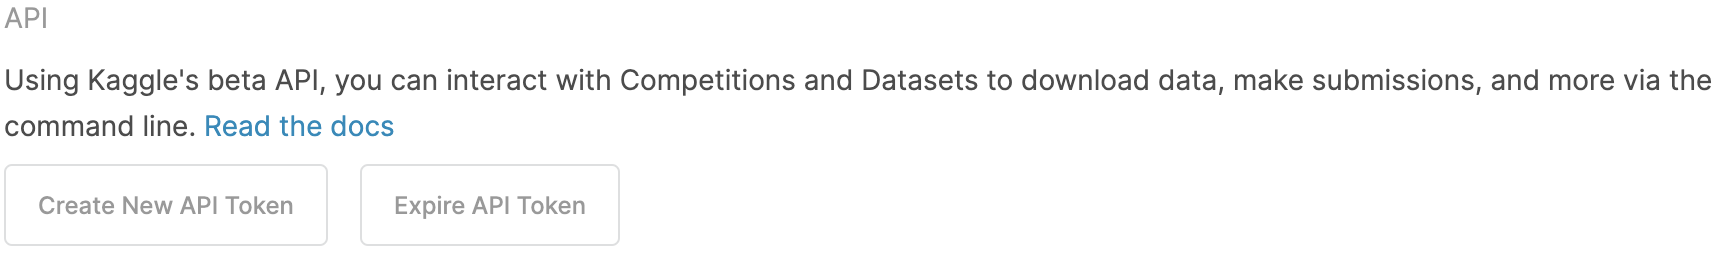

In [1]:
from pathlib import Path
import json
from pprint import pprint as pp
import IPython.display
from string import Template

import numpy as np
import pandas as pd
from joblib import Parallel, delayed


# Setup

In [2]:
# How to tell how many cores you have 
import multiprocessing

numCores = multiprocessing.cpu_count()
print ("# of CPU's in the sytems is: "  + str(numCores))

# of CPU's in the sytems is: 8


In [3]:
# This will allow you to choose the kaggle.json file you downloaded for upload
try:
    from google.colab import files
    files.upload()
    IN_COLAB = True
except:
    IN_COLAB = False

!pip install -q kaggle # Ensure latest kaggle cli
# Move the file to the correct directory for the kaggle cli to find
#TODO Check in in CoLab and IF neccesary in CoLab do mkdir
# !mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [13]:
%time !kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge

CORD-19-research-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)
CPU times: user 38.4 ms, sys: 12.8 ms, total: 51.1 ms
Wall time: 1.46 s


In [4]:
#!unzip -q CORD-19-research-challenge.zip -d data
# TODO - Check if files exist already
!cd /home/steve/projects/COVID-19-challenge
%time with zipfile.ZipFile('CORD-19-research-challenge.zip', 'r') as file:    file.extractall(path='data')

NameError: name 'zipfile' is not defined

# Initialization

In [5]:
def buildNameV1 (author) :
    templateString = ''
    #pp (author)
    key='first'
    #print(isinstance(author[key], str))
    if (isinstance(author[key], str)) & (len(author[key]) != 0) : # Assuming isinstance processed first to catch type that dont support len function
         templateString += '$' + key
    else:
        badDataLog('filename', "{'field': author[" + key + "], 'value': " + str(author) + "), 'error': 'missing or bad datatype'}")

    key='middle'
    if (isinstance(author[key], list)) :
        if len(author[key]) != 0 :
         templateString += ' $' + key
    else:
        badDataLog('filename', "{'field': author[" + key + "], 'value': " + str(author) + "), 'error': 'missing or bad datatype'}")
    
    key='last'
    if (isinstance(author[key], str)) & (len(author[key]) != 0) : # Assuming isinstance processed first to catch type that dont support len function
         templateString += ' $' + key
    else:
        badDataLog('filename', "{'field': author[" + key + "], 'value': " + str(author) + "), 'error': 'missing or bad datatype'}")

    key='suffix'
    if (isinstance(author[key], str)) : # Assuming isinstance processed first to catch type that dont support len function
        if len(author[key]) != 0 :
         templateString += ' $' + key
    else:
        badDataLog('filename', "{'field': author[" + key + "], 'value': " + str(author) + "), 'error': 'missing or bad datatype'}")

   
    
    author_template = Template(templateString)
    #print (author)
    return author_template.substitute(last=author['last'], 
                                      first=author['first'], 
                                      middle=' '.join(author['middle']),
                                      suffix=author['suffix'])

In [6]:
def buildName (author) :
    templateString = ''
    #pp (author)
    key='first'
    #print(isinstance(author[key], str))
    if (isinstance(author[key], str)) & (len(author[key]) != 0) : # Assuming isinstance processed first to catch type that dont support len function
         templateString += '$' + key
    else:
        badDataLog('filename', '{"field": author["' + key + '], "value": ' + str(author) + '), "error": "missing or bad datatype"}')

    key='middle'
    if (isinstance(author[key], list)) :
        if len(author[key]) != 0 :
         templateString += ' $' + key
    else:
        badDataLog('filename', '{"field": author["' + key + '], "value": ' + str(author) + '), "error": "missing or bad datatype"}')
    
    key='last'
    if (isinstance(author[key], str)) & (len(author[key]) != 0) : # Assuming isinstance processed first to catch type that dont support len function
         templateString += ' $' + key
    else:
        badDataLog('filename', '{"field": author["' + key + '], "value": ' + str(author) + '), "error": "missing or bad datatype"}')

    key='suffix'
    if (isinstance(author[key], str)) : # Assuming isinstance processed first to catch type that dont support len function
        if len(author[key]) != 0 :
         templateString += ' $' + key
    else:
        badDataLog('filename', '{"field": author["' + key + '], "value": ' + str(author) + '), "error": "missing or bad datatype"}')

   
    
    author_template = Template(templateString)
    #print (author)
    return author_template.substitute(last=author['last'], 
                                      first=author['first'], 
                                      middle=' '.join(author['middle']),
                                      suffix=author['suffix'])

In [7]:
errorLog = ''
errorLogFile = open('errors.json', 'w')
errorLogFile.close()
def badDataLog (file, msg) :
    """Purpose: To provide structured logs for bad data
       ToDo:
         - add timestamp, fileType, line or rec $, programName, where run, etc
         - If fileType is JSON, add FieldErros array of dicts ex: {field: errorMsg}
         - Ensure they pass 'msg' as dict so we can put in JSON format for parsing, 
             if they dont send message to parsing police, but let code go anyway :)
    """
    global errorLog
    errorMsg = '{"file": "' + file + '", "msg: "' + str(msg) + '},'
    print(errorMsg)
    errorLog = errorLog + errorMsg
#TODO - Fix for proper JSON formatting and parsing
#badDataLog("file", 'mymsg')

In [ ]:
print(Path().cwd() / 'data')
json_files = list((Path().cwd() / 'data').glob('**/*.json'))

def load_paper(f):
    with f.open() as fp:
        d = json.load(fp)
        paper = {}
        try:
            paper['title'] = d['metadata']['title']
        except:
            paper['title'] = None
            
        paper['authors'] = list(buildName(author) for author in  d['metadata']['authors']) #TODO - put try except around this and use BadLogger if error
        return paper

/home/steve/projects/COVID-19-challenge/data
{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'Shwetank', 'suffix': '', 'email': None, 'affiliation': {}}), "error": "missing or bad datatype"}},
{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'Shwetank', 'suffix': '', 'email': None, 'affiliation': {}}), "error": "missing or bad datatype"}},
{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'Rodrigo A. Valverde', 'suffix': '', 'email': None, 'affiliation': {}}), "error": "missing or bad datatype"}},
{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'Fakhar-i-Abbas', 'suffix': '', 'email': None, 'affiliation': {}}), "error": "missing or bad datatype"}},
{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'Argentinean Influenza Brazilian Working Gr

# Parsing Data

In [12]:
%time papers = Parallel(n_jobs=numCores, prefer="threads")(delayed(load_paper)(f) for f in json_files[1000:2000])

{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'Fakhar-i-Abbas', 'suffix': '', 'email': None, 'affiliation': {}}), "error": "missing or bad datatype"}},
{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'Argentinean Influenza Brazilian Working Group Vaccine', 'suffix': '', 'email': None, 'affiliation': {}}), "error": "missing or bad datatype"}},
{"file": "filename", "msg: "{"field": author["first], "value": {'first': '', 'middle': [], 'last': 'NA.', 'suffix': '', 'email': None, 'affiliation': {}}), "error": "missing or bad datatype"}},
CPU times: user 2.42 s, sys: 188 ms, total: 2.61 s
Wall time: 2.39 s


In [ ]:
# %time titles = [load_paper(f) for f in json_files]
%time papers = Parallel(n_jobs=numCores, prefer="threads")(delayed(load_paper)(f) for f in json_files)

# Play Area

### Create a Meta Data structure to for the dict structure and how to check and group

For each "field"
 - path/keys
 - function call for validity check
 - replacement value if not value default=None
 - grouping functions for lists
 
First attempt will be for just Metadata
First 

 TODO
  - [ ] Add tests for name parsing
  - [ ] Fix counts for bad titles and bad authors, may be better to do from "badDataLog"
  - [ ] Write badDataLog to file (and deal with writing to file while using parrallel

In [ ]:
# TODO - turn this into a unitTest and code it Test First :)

testAuthorList = [{'first': 'Tobias',
  'middle': ['Stephen', 'Alan', 'Javier'],
  'last': 'Brett',
  'suffix': '',
  'email': None,
  'affiliation': {}},
 {'first': 'John',
  'middle': ['M.'],
  'last': 'Drake',
  'suffix': '',
  'email': None,
  'affiliation': {}},
 {'first': 'Pejman',
  'middle': [],
  'last': 'Rohani',
  'suffix': '',
  'email': None,
  'affiliation': {}}]
testAuthorList
list(buildName(author) for author in  testAuthorList  )

In [ ]:
# Check to see how many documents have no title
len([t for t in titles if t is None]) # TODO Fix for new papers structure

In [ ]:
print('['+errorLog + ']'[0:40])
#IPython.display.JSON(json.loads('['+errorLog + ']'))

In [ ]:
isinstance(None, str)

In [ ]:
for item in d['metadata']['authors'][0].items() :
    key, val = item
    valType = type(val)
    print(item, key, valType)

In [ ]:
# Attempt to rewrite - but wound up back where we started as .get for dict can still thro
print(Path().cwd() / 'data')
json_files = list((Path().cwd() / 'data').glob('**/*.json'))

def load_paper(f):
    missingCnt = 0
    with f.open() as fp:
        d = json.load(fp)
        return d.get('metadata', {}).get('title', None) # Should probably use a try except around this, but it defeats the purpose ugh. 

%time titles = [load_paper(f) for f in json_files]

In [26]:
f = open(json_files[0])
d = json.load(f)
d.keys()

dict_keys(['paper_id', 'metadata', 'body_text', 'ref_entries', 'back_matter', 'bib_entries'])

In [27]:
d['metadata']

{'title': 'CD8 T Cell–Independent Antitumor Response and Its Potential for Treatment of Malignant Gliomas',
 'authors': [{'first': 'Katherine',
   'middle': ['A.'],
   'last': 'Murphy',
   'suffix': '',
   'email': None,
   'affiliation': {}},
  {'first': 'Thomas',
   'middle': ['S.'],
   'last': 'Griffith',
   'suffix': '',
   'email': None,
   'affiliation': {}},
  {'first': 'Vita',
   'middle': [],
   'last': 'Golubovskaya',
   'suffix': '',
   'email': None,
   'affiliation': {}}]}

In [29]:
IPython.display.JSON(d)

<IPython.core.display.JSON object>